In [89]:
import os
import numpy as np
import skimage.io as io
import skimage.transform as transform
from scipy.ndimage.interpolation import rotate
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from glob import glob

In [11]:
from preprocessing import imread, show_image

# GET RANDOM HUMAN

Original Picture


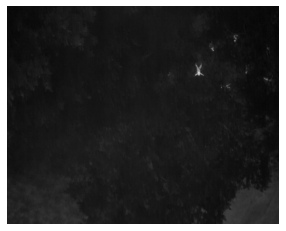

Image shape: (512, 640)
Cropped Human


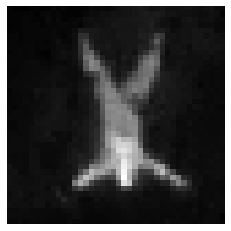

Thresholded Human


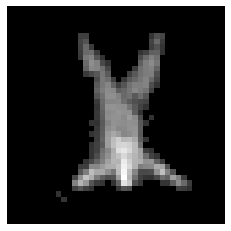

Padded Human


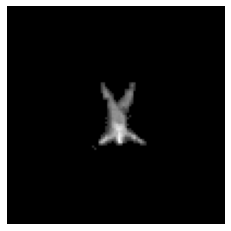

In [84]:
source_human = imread(glob("./data/F1/Images/1/*"))[17]
print("Original Picture")
show_image(source_human)
print("Image shape:", source_human.shape)

# crop human
print("Cropped Human")
cropped_human = source_human[130:170,430:470]
show_image(cropped_human)

# threshold human
print("Thresholded Human")
th = 50
thres_human = cropped_human.copy()
thres_human[thres_human < th] = 0
show_image(thres_human)

# pad human
print("Padded Human")
extra_left, extra_right = 30, 30
extra_top, extra_bottom = 30, 30

padded_human = np.pad(thres_human, ((extra_left, extra_right), (extra_top, extra_bottom)),
       mode='constant', constant_values=0)

show_image(padded_human)

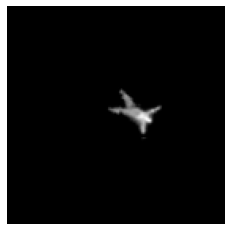

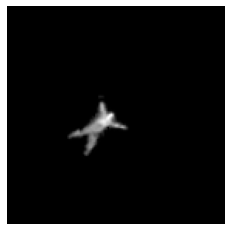

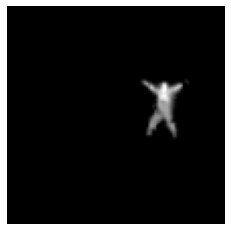

In [95]:
### Apply augmentations on the foreground.

def foregroundAug(foreground):
    # Random rotation, zoom, translation
    foreground_rotated = rotate(foreground, np.random.randint(0,360), reshape=True)
#     angle = np.random.randint(-10,10)*(np.pi/180.0) # Convert to radians
    zoom = np.random.random()*0.4 + 0.8 # Zoom in range [0.8,1.2)
    t_x = np.random.randint(0, int(foreground.shape[1]/3))
    t_y = np.random.randint(0, int(foreground.shape[0]/3))

    tform = transform.AffineTransform(scale=(zoom,zoom),
#                                 rotation=angle,
                                translation=(t_x, t_y))
    foreground = transform.warp(foreground_rotated, tform.inverse)

    # Random horizontal flip with 0.5 probability
    if(np.random.randint(0,100)>=50):
        foreground = foreground[:, ::-1]
        
    return foreground

random_humans = [foregroundAug(padded_human) for i in range(3)]
[show_image(random_human) for random_human in random_humans];

In [99]:
random_humans[0].shape

(138, 138)

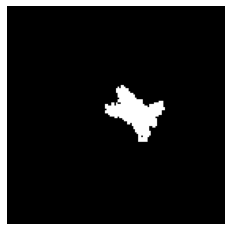

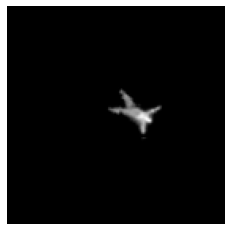

(None, None)

In [104]:
# Create a mask for this new foreground object
def getForegroundMask(foreground):
    mask_new = foreground.copy()[:,:]
    mask_new[mask_new>0] = 1
    return mask_new

mask_new = getForegroundMask(random_humans[0])
show_image(mask_new), show_image(random_humans[0])

# FOREST

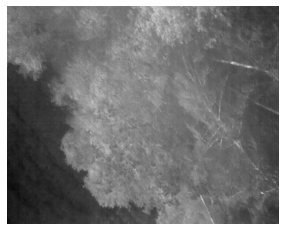

In [134]:
source_forest = imread(glob('./data/F3/Images/9/*.tiff'))[-3] / 255.
show_image(source_forest)

# BLEND HUMAN INTO FOREST

In [172]:
def blend(human, forest, verbose=True):
    blend = forest.copy()
    # find x and y coordinates
    x = np.random.randint(0,blend.shape[1]-human.shape[1])
    y = np.random.randint(0,blend.shape[0]-human.shape[0])
    # blend and account for occlusion
    blend[y:human.shape[0]+y,x:human.shape[1]+x] += human * (1 - (blend[:human.shape[0],:human.shape[1]])**(1/2))
    
    # threshold
    blend[blend > 255] = 255
    
    if verbose:
        show_image(blend)
    return blend

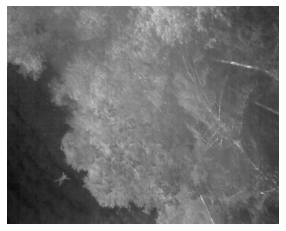

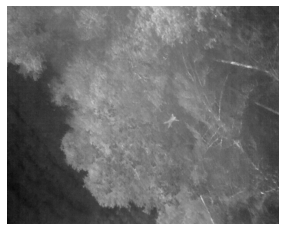

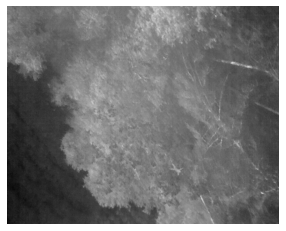

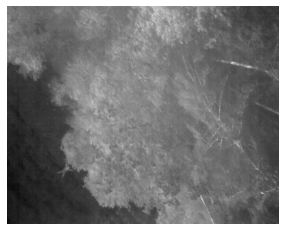

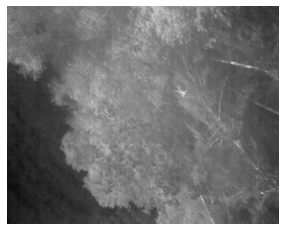

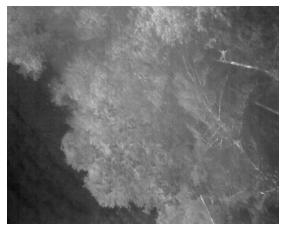

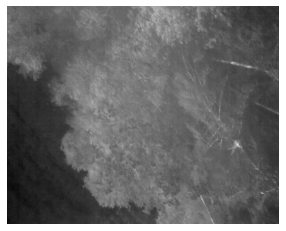

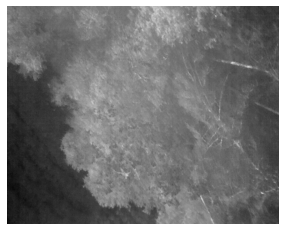

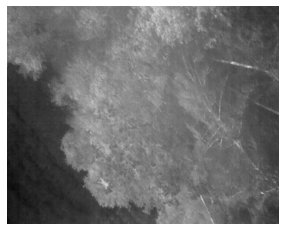

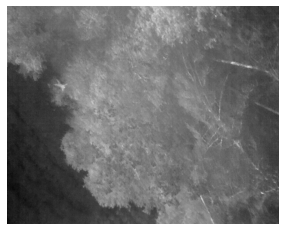

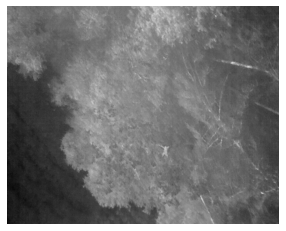

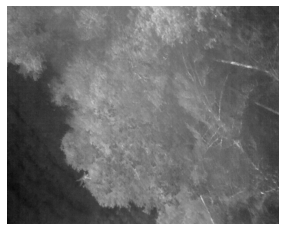

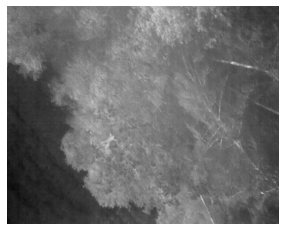

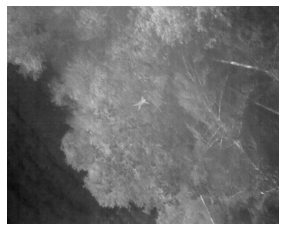

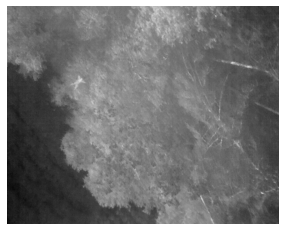

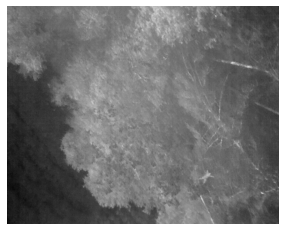

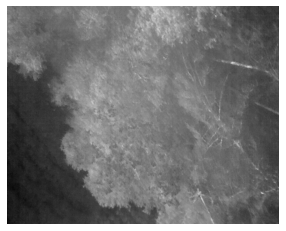

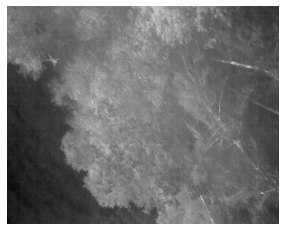

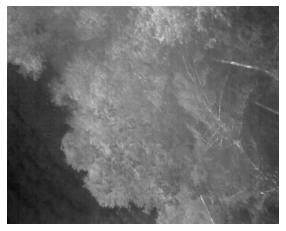

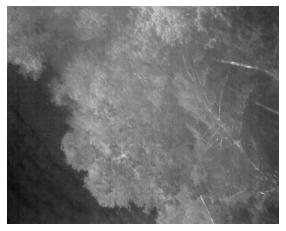

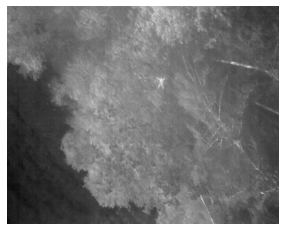

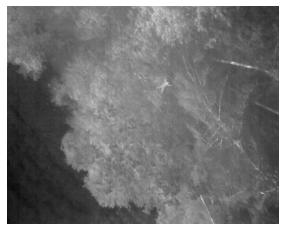

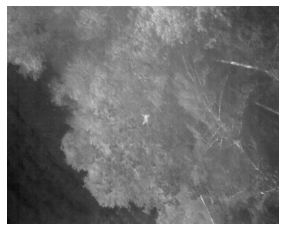

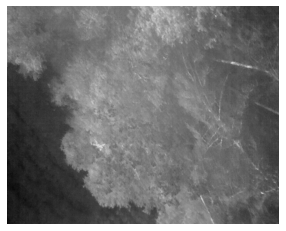

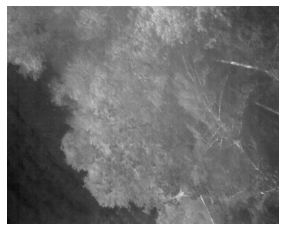

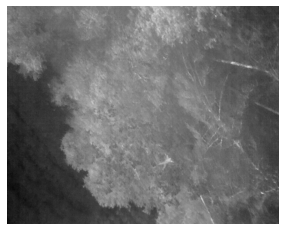

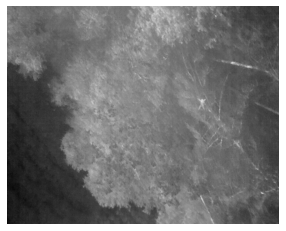

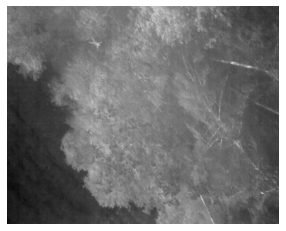

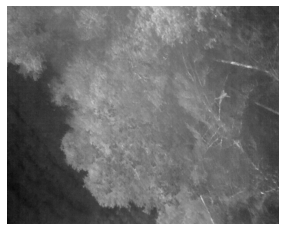

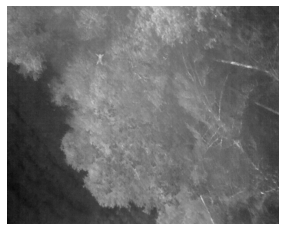

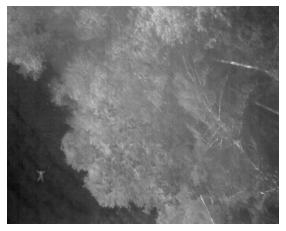

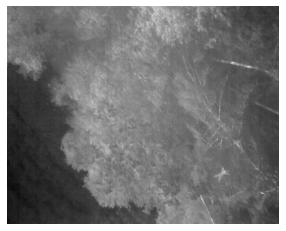

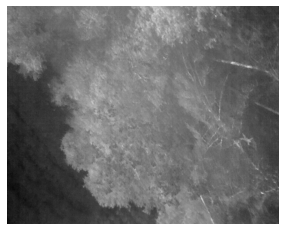

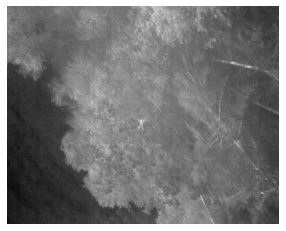

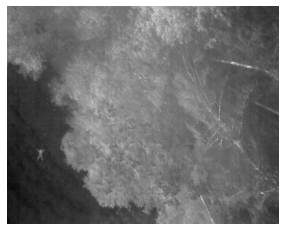

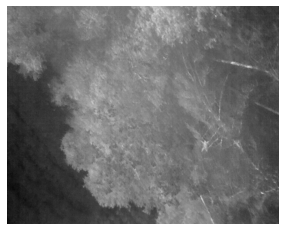

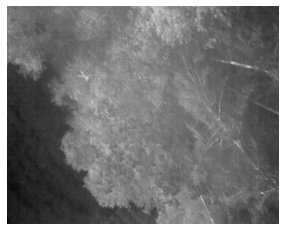

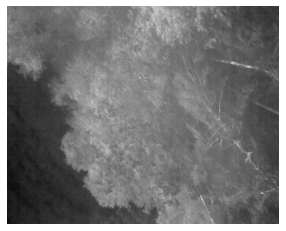

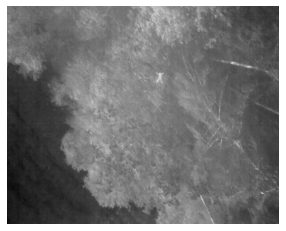

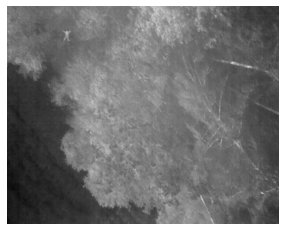

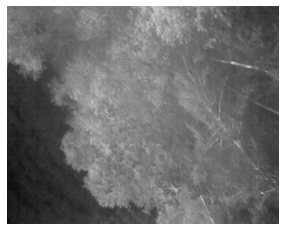

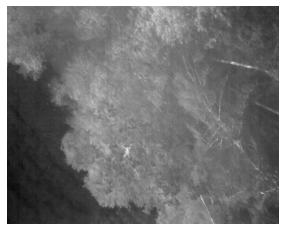

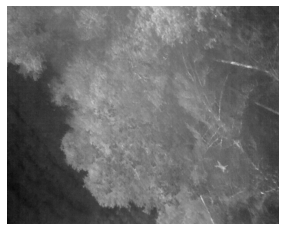

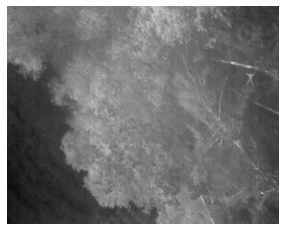

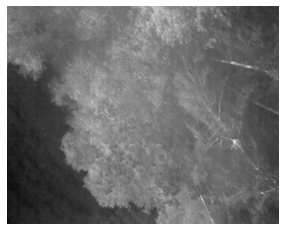

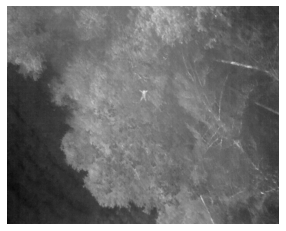

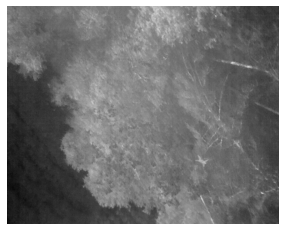

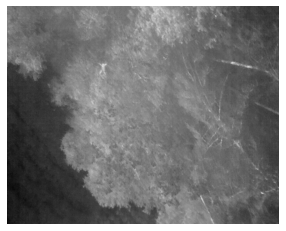

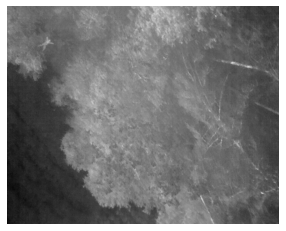

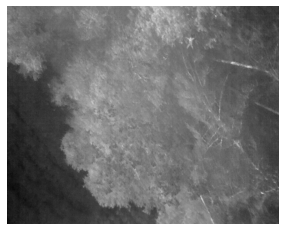

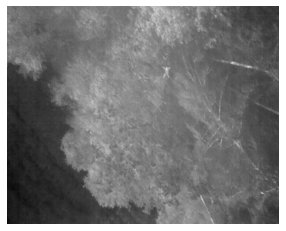

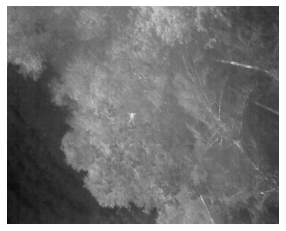

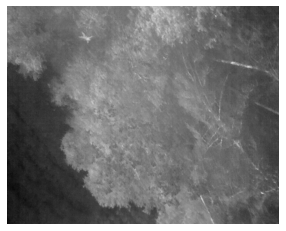

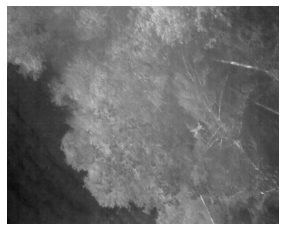

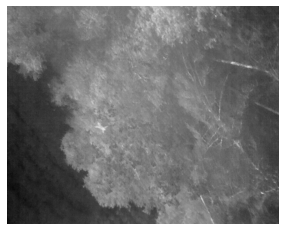

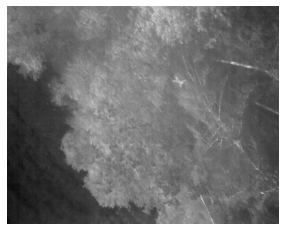

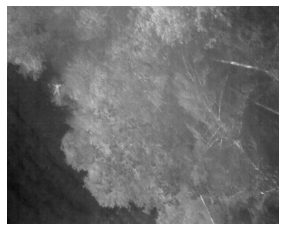

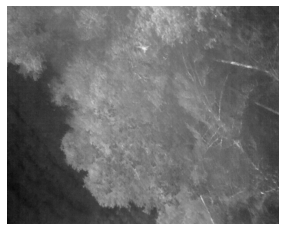

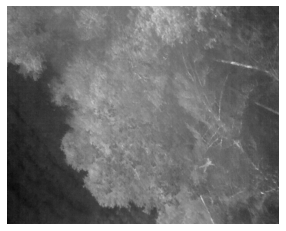

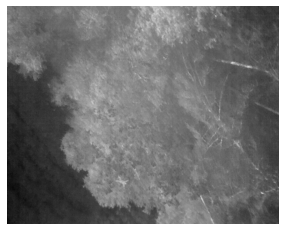

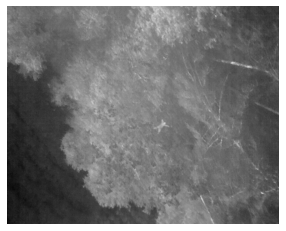

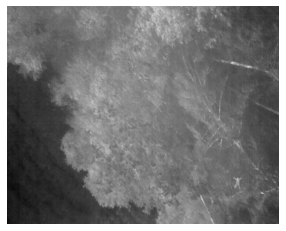

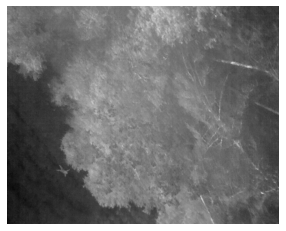

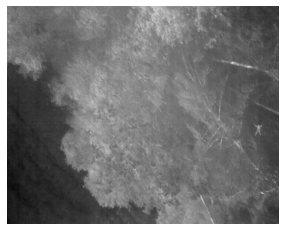

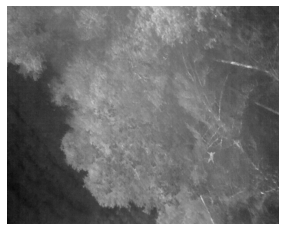

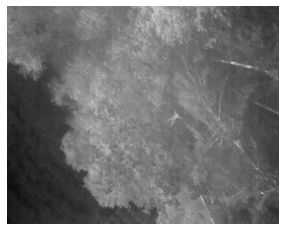

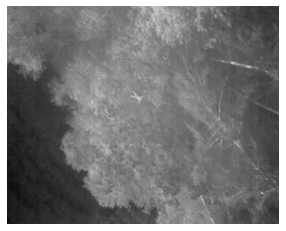

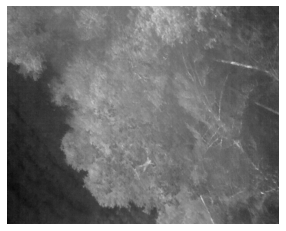

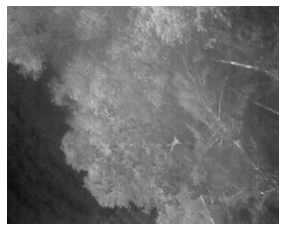

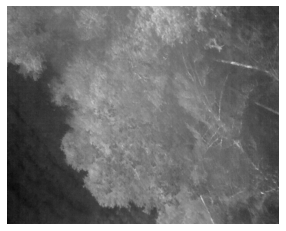

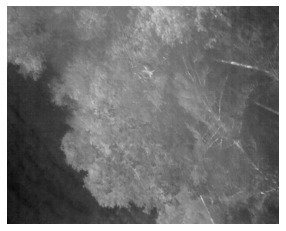

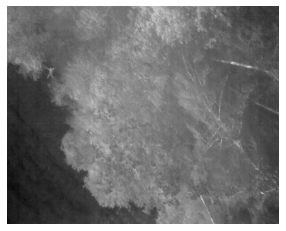

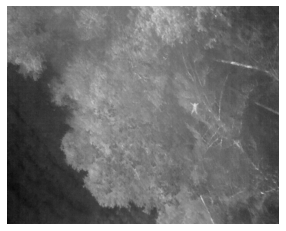

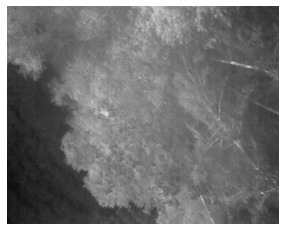

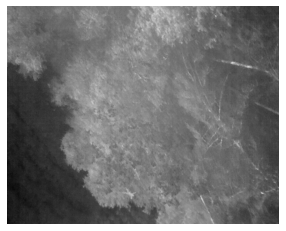

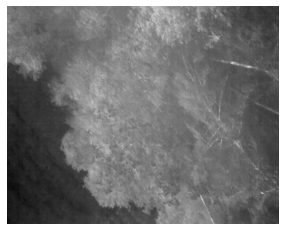

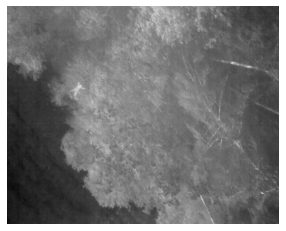

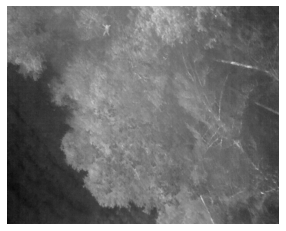

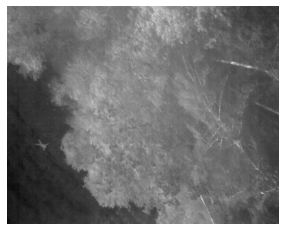

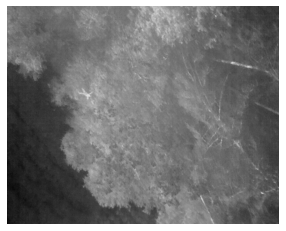

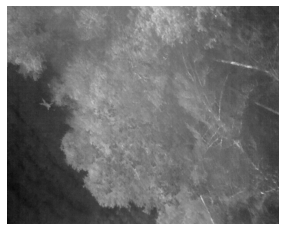

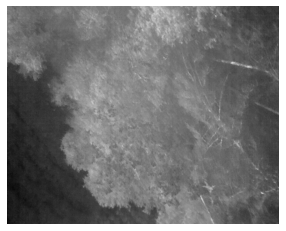

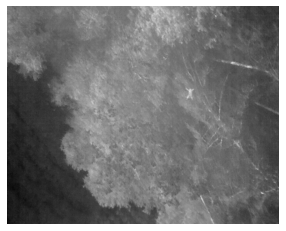

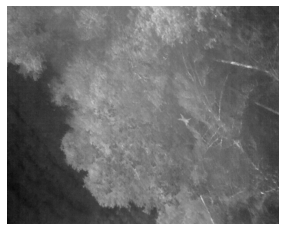

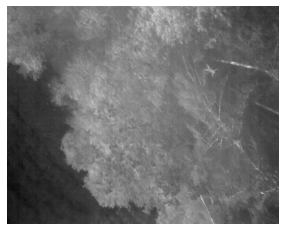

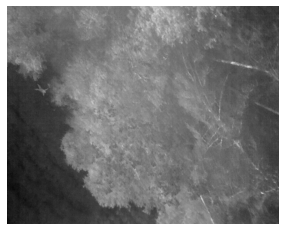

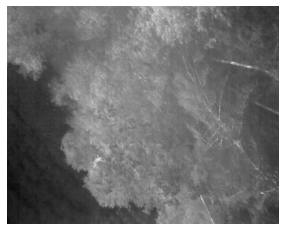

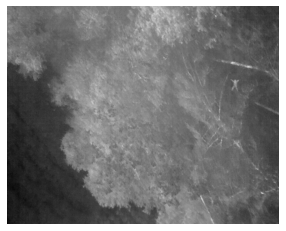

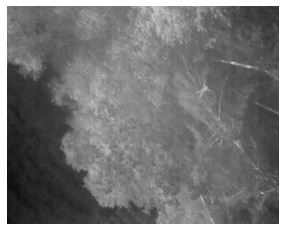

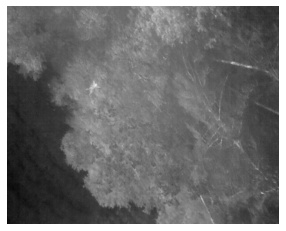

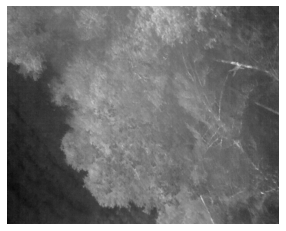

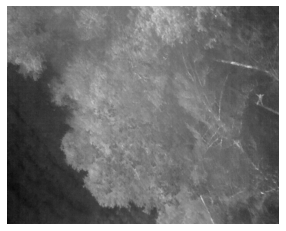

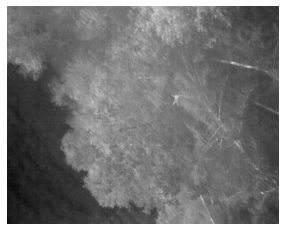

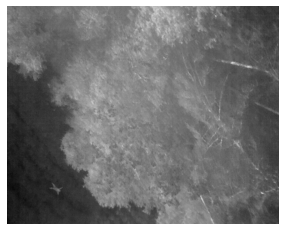

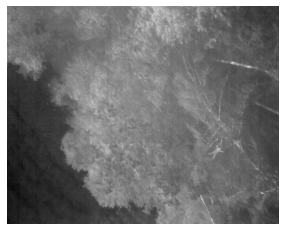

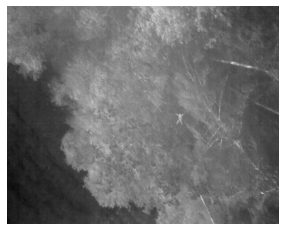

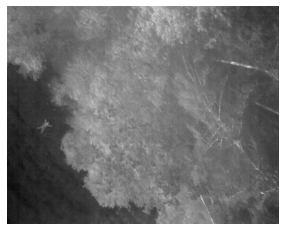

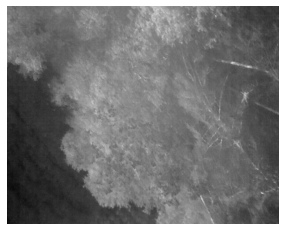

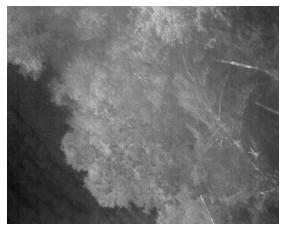

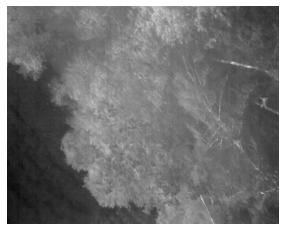

In [174]:
[blend(np.random.choice(random_humans), source_forest) for i in range(100)];

In [133]:
random_humans[0].max()

0.9048558117780503